Imports

In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np

Question 1: Optimise the following function using torch autograd and gradient descent, f(θ) = (θ₀ - 2)² + (θ₁ - 3)². In addition to finding the optima, you need to show the convergence plots.

In [2]:
##Function to be minimized
f = lambda theta: (theta[0] -2)**2 + (theta[1] - 3)**2

In [3]:
##Optimization function

def optimize(lr, iterations, theta, func):
    losses = []
    optimizer = torch.optim.SGD([theta], lr=lr)
    for i in range(iterations):
        optimizer.zero_grad()
        loss = func(theta)
        loss.backward()
        optimizer.step()

        losses.append(loss.item())

    print('Optimal Paramters:', "θ₀: " ,theta[0].item(),"θ₁: ", theta[1].item())
    print('Final Loss:', losses[-1])
    return losses,theta

def plot_convergence(losses):
    plt.plot(losses)
    plt.xlabel('iterations')
    plt.ylabel('loss')
    plt.title('Convergence Plot')
    plt.show()
    

Optimal Paramters: θ₀:  1.999381422996521 θ₁:  2.9990715980529785
Final Loss: 1.2956879800185561e-06


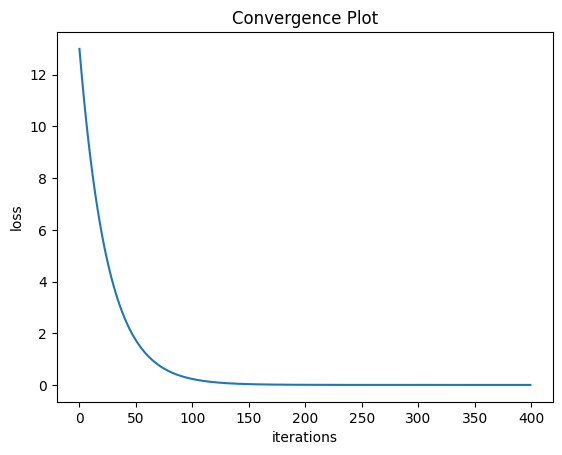

In [4]:
theta = torch.tensor([0.0, 0.0], requires_grad=True)
losses,theta = optimize(0.01,400,theta,f)
plot_convergence(losses)

Question 2: Generate some data (100 data points) using a univariate Normal distribution with loc=2.0 and scale=4.0.

a. Plot a 2d contour plot showing the Likelihood or the Log-Likelihood as a function of loc and scale. Please label all the axes including the colorbar. 

In [5]:
def ll(mu, sigma,data):
    mu = torch.tensor(mu)
    sigma = torch.tensor(sigma)
    return torch.distributions.Normal(loc=mu, scale=sigma).log_prob(data).sum()


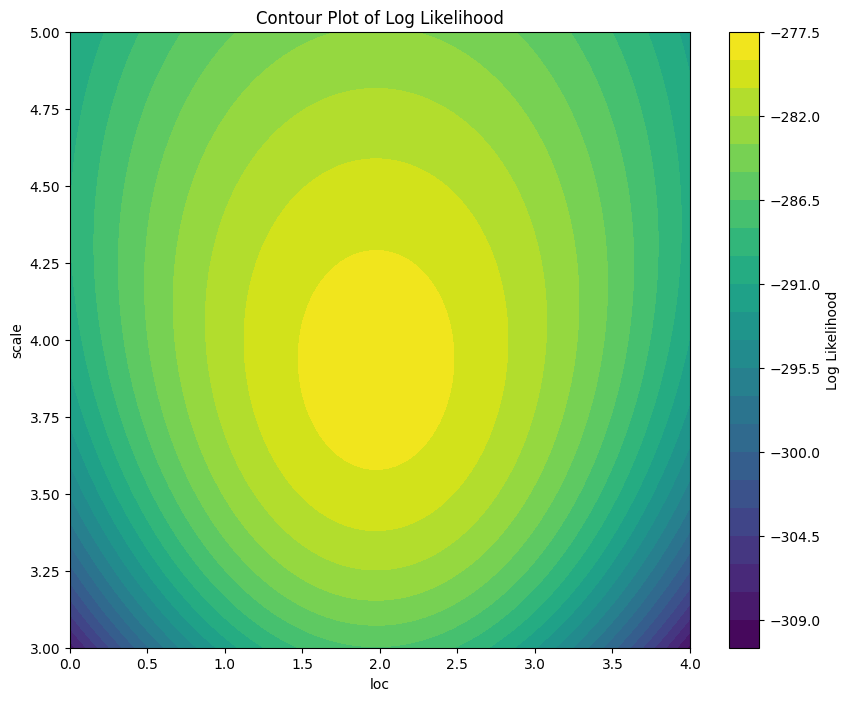

In [6]:
##Generating 100 datapoints from a univariate Normal distribution

torch.manual_seed(20)
normal = torch.distributions.Normal(loc=2.0, scale=4.0)
num_data_points = 100
data = normal.sample((num_data_points,))


loc_values = np.linspace(0, 4, 100)
scale_values = np.linspace(3, 5, 100)
loc_grid, scale_grid = np.meshgrid(loc_values, scale_values)


#Creating a grid of log likelihood values
log_likelihood_values = np.zeros_like(loc_grid)
for i in range(len(loc_values)):
    for j in range(len(scale_values)):
        log_likelihood = ll(loc_values[i], scale_values[j], data)
        log_likelihood_values[j, i] = log_likelihood.item()

# Create the contour plot
plt.figure(figsize=(10, 8))
contour = plt.contourf(loc_grid, scale_grid, log_likelihood_values, levels=20, cmap='viridis')
plt.colorbar(contour, label='Log Likelihood')
plt.xlabel('loc')
plt.ylabel('scale')
plt.title('Contour Plot of Log Likelihood')
plt.show()


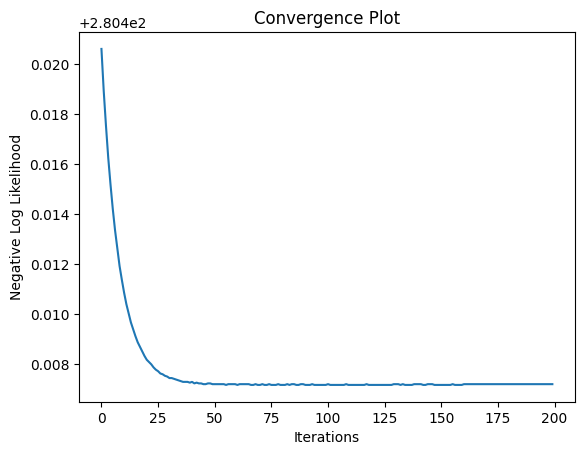

MLE Parameters:
loc: 1.9347765445709229
scale: 3.995358943939209


In [14]:
import torch
import matplotlib.pyplot as plt


loc = torch.tensor([2.0], requires_grad=True)
scale = torch.tensor([4.0], requires_grad=True)
data = torch.distributions.Normal(loc=2, scale=4).sample((100,))

learning_rate = 0.01
optimizer = torch.optim.SGD([loc, scale], lr=learning_rate)


convergence = []
iterations = 200


for i in range(iterations):
    optimizer.zero_grad()  
    log_likelihood = torch.distributions.Normal(loc=loc, scale=scale).log_prob(data).sum()
    loss = -log_likelihood  
    loss.backward()  
    optimizer.step() 
    
    # Save convergence information
    convergence.append(-log_likelihood.item())

# Plot the convergence
plt.plot(range(iterations), convergence)
plt.xlabel('Iterations')
plt.ylabel('Negative Log Likelihood')
plt.title('Convergence Plot')
plt.show()

print("MLE Parameters:")
print("loc:", loc.item())
print("scale:", scale.item())


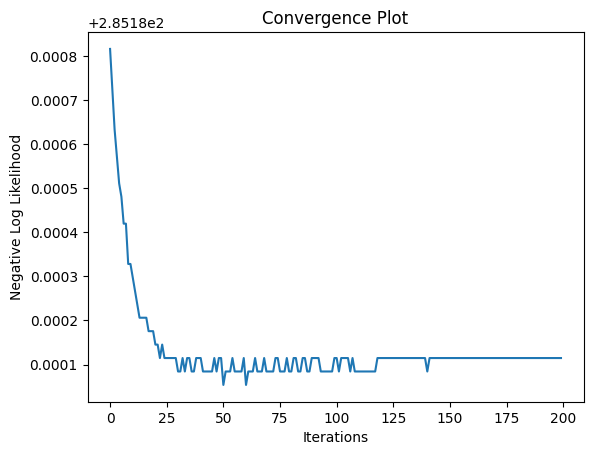

MLE Parameters:
loc: 1.9847456216812134
scale: 4.0


In [22]:
import torch
import matplotlib.pyplot as plt


loc = torch.tensor([2.0], requires_grad=True)
scale = torch.tensor([4.0], requires_grad=True)
log_scale = torch.tensor(torch.log(scale).detach().numpy(), requires_grad=True)
data = torch.distributions.Normal(loc=loc, scale=scale).sample((100,))

learning_rate = 0.01
optimizer = torch.optim.SGD([loc, log_scale], lr=learning_rate)


convergence = []
iterations = 200


for i in range(iterations):
    optimizer.zero_grad()  
    log_likelihood = torch.distributions.Normal(loc=loc, scale=scale).log_prob(data).sum()
    loss = -log_likelihood  
    loss.backward()  
    optimizer.step() 
    # Save convergence information
    convergence.append(-log_likelihood.item())

# Plot the convergence
plt.plot(range(iterations), convergence)
plt.xlabel('Iterations')
plt.ylabel('Negative Log Likelihood')
plt.title('Convergence Plot')
plt.show()

print("MLE Parameters:")
print("loc:", loc.item())
print("scale:", log_scale.exp().item())


It is better to learn log(scale) rather than scale because we know that scale is a positive number. Hence, firstly during gradient descent there are no constraints on the value of scale, thus, to put constraints it is better to learn log(scale). Secondly, the value of scale can be very large and hence the gradient descent will be very slow. Hence, it is better to learn log(scale) rather than scale.

Q3

Generate some data (1000 data points) using a univariate Normal distribution with loc=2.0 and scale=4.0 and using Student-T distributions with varying degrees (from 1-8) of freedom (1000 data points corresponding to each degree of freedom). Plot the pdf (and logpdf) at uniformly spaced data from (-50, 50) in steps of 0.1. What can you conclude?

In [ ]:
data = torch.distributions.Normal(loc =2, scale =4)
